<h1 align="center">Statistical Inference, Demo 5</h1>

<br>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import beta
from scipy.stats import norm

<h3 align="left">Task 1</h3>

Out of 20 observed drivers, 3 were talking on the phone while driving. For this proportion, the maximum likelihood estimate $\, \hat\theta = \frac{3}{20} = 0.15 \,$ is obtained. Construct an 85 %  credible interval for $\, \hat\theta. \,$

**Solution:**

In *Bayesian statistics*, a [*credible interval*](https://en.wikipedia.org/wiki/Credible_interval) is a range of values that represent a given level of plausibility, based on the [*posterior probability distribution*](https://en.wikipedia.org/wiki/Posterior_probability). In other words, credible intervals are intervals whose values have a (posterior) probability density, representing the plausibility that the parameter has those values. 

Posterior probability is a conditional probability conditioned on randomly observed data. Hence, it is a random variable. For a random variable, it is important to summarize its amount of uncertainty. One way to achieve this goal is to provide a credible interval of the posterior probability.

Methods for defining a suitable credible interval include:

Choosing the narrowest interval, which for a [unimodal](https://en.wikipedia.org/wiki/Unimodality#Unimodal_probability_distribution) distribution will involve choosing those values of highest probability density including the [mode](https://en.wikipedia.org/wiki/Mode_(statistics)) (the [maximum a posteriori](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) $\, \boldsymbol{\rightarrow} \, $ [point estimate](https://en.wikipedia.org/wiki/Point_estimation)). This is sometimes called the highest posterior density interval (HPDI).

*A point estimate* is a single number that represents our "best guess" for the parameter. It is a measure of central tendency of the posterior distribution.

*Highest posterior density interval* is the narrowest credible interval for a given level of plausibility (i.e., the credible interval that includes the most plausible values).

The likelihood function can be modeled as a binomial distribution with parameters n=20 and k=3, where n is the number of trials and k is the number of successes. \
The [Beta](https://en.wikipedia.org/wiki/Beta_distribution) distribution is a  conjugate prior distribution for a binomial likelihood. Let's use a non-informative prior $\, Beta(1, 1). \,$ Now, the posterior distribution is:

$$\, Beta(\alpha + k, \beta + n - k) = Beta(1 + 3, 1 + 20 - 3) = Beta(4, 18).$$

We are looking for an interval [a,b] such that $\, P(a \le \Theta \le b) = 0.85. \,$ In other words, we want to find an area from the PDF such that the probability that we fall into the area is 85%.

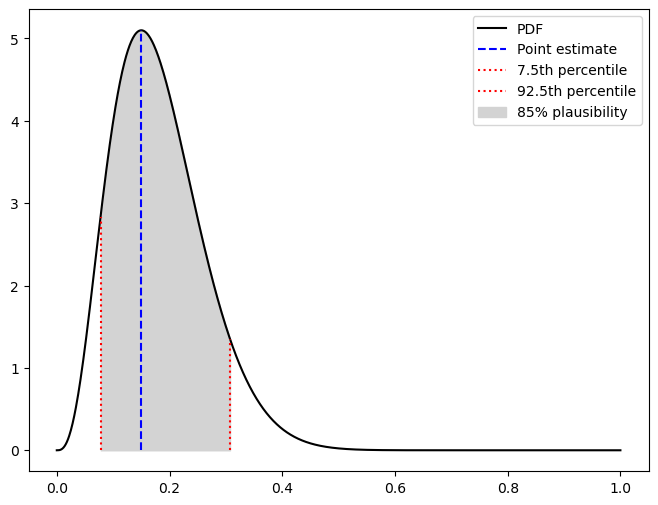

In [38]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
a = 4
b = 18
theta = np.linspace(0, 1, 1000)

# Beta(4, 18) PDF
beta_pdf = beta.pdf(x=theta, a=a, b=b)
ax.plot(theta, beta_pdf, label='PDF', c='black')

# Point estimate
point_estimate = beta.pdf(x=0.15, a=a, b=b)
ax.vlines(x=0.15, 
             ymin=0, 
             ymax=point_estimate, 
             colors='blue', 
             linestyle='dashed',
             label='Point estimate')

# The area that contains 85 % of the mass of the PDF 
beta_ppf_075 = beta.ppf(q=0.075, a=4, b=18)
beta_ppf_925 = beta.ppf(q=0.925, a=4, b=18)
beta_pdf_075 = beta.pdf(x=beta_ppf_075, a=a, b=b)
beta_pdf_925 = beta.pdf(x=beta_ppf_925, a=a, b=b)

ax.vlines(x=beta_ppf_075,
             ymin=0,
             ymax=beta_pdf_075,
             colors='red',
             linestyle='dotted',
             label='7.5th percentile')
             

ax.vlines(x=beta_ppf_925,
             ymin=0,
             ymax=beta_pdf_925,
             colors='red',
             linestyle='dotted',
             label='92.5th percentile')

ax.fill_between(x=theta,
                   y1=0,
                   y2=beta_pdf,
                   where=(theta >= beta_ppf_075) & (theta <= beta_ppf_925),
                   color='lightgrey',
                   label='85% plausibility')
             
ax.legend();

Let $\, F_{beta} \,$ denote the CDF of Beta(4, 18). Then, $\, a = F^{-1}_{Beta} (0.075) \approx 0.0776 \,$ and $\, b = F^{-1}_{Beta} (0.925) \approx 0.3074 \,$ $\, \boldsymbol{\rightarrow} \,$ **85% credible interval is [0.0776, 0.3074]**. The interpretation for this is that the true value of $\, \theta \,$ is in this interval with a probability of 0.85.

<br>

<br>

<h3 align="left">Task 2</h3>

Let **X** be the number of successes in 100 independent trials. \
Then, $\, X \sim Bin (\theta, 100), \,$ where $\, \theta \,$ is an unknown parameter. It is only known that $\, X \le 10. \,$

a) Show that the maximum likelihood estimate $\, \hat\theta = 0. \,$

**Solution (a):**

The likelihood function for the binomial distribution is:

\begin{align*}
    L(\theta) = \binom{n}{x} \, \theta^{x} \, (1 - \theta)^{n - x}
\end{align*}

The logarithimc likelihood is:

\begin{align*}
    l(\theta) = log\binom{n}{x} \, + \, x \, log(\theta) \, + \, (n - x) \, log(1 - \theta).
\end{align*}

The score function is:

\begin{align*}
    \frac{d \, l(\theta)}{d \, \theta} = \frac{x}{\theta} - \frac{n - x}{1 - \theta}
\end{align*}

To obtain $\, \hat\theta, \,$ one needs to maximize the score function:

\begin{align*}
    \frac{d \, l(\theta)}{d \, \theta} = 0
\end{align*}

\begin{align*}
   \boldsymbol{\Leftrightarrow} \quad \hat\theta = \frac{x}{n},
\end{align*}

where x is the number of successes in $\, n = 100 \,$ independent trials.

$\boldsymbol{\rightarrow}$ $\, \hat\theta = 0 \,$ when $\, x = 0. \,$

<br>

<br>

<h3 align="left">Task 3</h3>

The seeds of a pea plant are classified as round (R) or angular (A), and green (G) or yellow (Y), resulting in four types of seeds: RY (round and yellow), RG (round and green), AY (angular and yellow) and AG (angular and green). Test the null hypothesis based on Gregor Mendel's (1822–1884) theory, which states that the probabilities of these four seed types are $\, \theta_1, \theta_2, \theta_3 \, \text{and} \, \theta_4. \,$ \
The data consists of 556 seeds classified according to the following table:

| Seed Type | Frequency |   Probability ($\theta_i$)  | 
|-----------|-----------|-----------------------------|
| RY        | 315       | $\boldsymbol{\frac{9}{16}}$ |
| RG        | 108       | $\boldsymbol{\frac{3}{16}}$ |
| AY        | 101       | $\boldsymbol{\frac{3}{16}}$ |
| AG        | 32        | $\boldsymbol{\frac{1}{16}}$ |

**Solution:**

To test the null hypothesis based on Gregor Mendel's theory, one should use the [$\, \chi^2$ test](https://en.wikipedia.org/wiki/Chi-squared_test), which is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies of a contigency table.

Note that the following assumptions must be met when conducting the $\, \chi^2$ test:

- the sample is independent,
- at most 1/5 of the expected frequencies $\, e_{i} \,$ are smaller than 5,
- none of the expected frequencies $\, e_{i}\, $ are smaller than 1.

Expected frequency refers to the predicted occurrence rate of a specific event within a set of trials or experiments. It quantifies how often you anticipate the event happening, based on the underlying probability and the total number of experiments conducted. To calculate it, you simply multiply the total number of experiments by the probability of the event's occurrence. This calculation provides a theoretical value that represents the average number of times the event is expected to occur over the long run under consistent conditions.

In our case, given the null hypothesis, the test statistic is given by:

\begin{align*}
    \chi^2 = \sum_{i=1}^{4} \frac{(o_i - e_i)^2}{e_i} \quad \sim \chi^2(k-1),
\end{align*}

where $\, o_i \,$ is the ith observed frequency and $\, e_i \,$ is the corresponding expected frequency, and k is the number of mutually exclusive classes (the different seed types) with respective observed number of observations $\, x_i \,$ (for $\, i = 1,2,...,k).$

In [96]:
def chi_squared_test(obs_f: list[int], p: list[float], n: int) -> str:
    """
    Calculates the chi-squared test statistic 
    and the associated p-value.
    
    Args:
        obs_f: the observed frequencies.
        p: the probabilities of the different seed types 
           associated with the null hypothesis.
                
    Returns:
        The chi-squared test statistic and the associated p-value.
        
    Notes:
        - Chi-squared tests are always right-tailed tests.
    """
    expected_freqs = [theta * n for theta in p]
    chi_squared_val = sum([(o - e)**2 / e for (o, e) in zip(obs_f, expected_freqs)])
    df = len(obs_f) - 1
    p_val = sp.stats.chi2.sf(chi_squared_val, df)
    return f'Test statistic: {chi_squared_val}\
           \np-value: {p_val}\
           \nExpected frequencies: {expected_freqs}'

In [97]:
obs_freqs = [315, 108, 101, 32]
thetas = [9/16, 3/16, 3/16, 1/16]
n = sum(observed_freqs)

In [101]:
print(chi_squared_test(obs_freqs, thetas, n))

Test statistic: 0.4700239808153477           
p-value: 0.925425895103616           
Expected frequencies: [312.75, 104.25, 104.25, 34.75]


- The p-value associated with the $\, \chi^2$ test statistic of 0.47 with 3 degrees of freedom is approximately 0.925.

- This high p-value suggests that there is not enough evidence to reject the null hypothesis, indicating that the observed frequencies of the seed types do not significantly differ from the expected frequencies.

- Also, the expected frequencies meet the previously mentioned criteria.

<br>

<br>

<h3 align="left">Task 4</h3>

a) Mitkä olivat inkluusio- ja ekskluusiokriteerit?

Ekskluusio:

- Patients excluded from the trial included those with symptoms suggestive of atypical parkinsonism, dementia, other significant neurological diseases, psychiatric disorders, or severe systemic illnesses. Fertile women and patients with clinically relevant laboratory values outside the normal range or ECG findings not related to a chronic stable disease were also excluded
- usage of apomorphine not allowed

Inkluusio:

- Idiopathic Parkinson's disease
- Patients without fluctuations as well as those with more advanced disease associated with fluctuating motor responses to levodopa, as classified by home diaries, were included.
- All patients were being treated with levodopa, either as a standard formulation alone, as a CR levodopa preparation alone, or as a combination of these.
- The patients’ antiparkinsonian drug treatment had to remain stable for at least four weeks before randomisation.

b) Millaista koeasetelmaa tutkimuksessa käytettiin?

Study design:

- 6 months
- 300 participants that were stratified into two groups:
    - 172 fluctiating patients, 
    - 128 non-fluctiating patients
- randomised (satunnaistettu)
- placebo controlled (lumekontrolloitu)
- [kaksoissokkotutkimus](https://fi.wikipedia.org/wiki/Sokkokoe). 

c) Mikä oli päävaste ja kuinka se mitattiin?

Päävaste (fluctiating patients):

- The fluctiating patients were asked to record to record ON, OFF or ASLEEP time in 30 minute intervals before the study.
- ON state was defined as the time when the patients were free of many parkinsonian symptoms.
- The primary efficacy variable for the fluctuating patients was the proportion of daily ON time (%) while awake.
- The primary efficacy variable was collected from home diaries.

Päävaste (non-fluctiating patients)


- The primary efficacy variable for non-fluctuating patients was the ADL subscale score (part II) of the UPDRS.

d) Mikä oli tilastollinen malli?

The statistical model used in the study is an Analysis of Covariance (ANCOVA) for repeated measures. This model was employed to evaluate the efficacy variables (home diary data, UPDRS scores, and levodopa dose) by estimating the treatment difference between groups over time (from months 4 to 6).

The evaluations of the primary efficacy variables in both fluctuating and non-fluctuating patients were done according to the intention to treat (ITT) principle using observed cases (ITT-OC). Patients with at least one efficacy measurement on study treatment were included in the efficacy analysis.

e) Millainen tulos tutkimuksesta saatiin?

Fluctiating patients:

- Entacapone significantly increased the proportion of daily ON time, the primary efficacy variable, from 58% to 65% (p < 0.05).
- The absolute ON time increased significantly (p < 0.01), with a difference of 1.2 hours between the entacapone and placebo groups.

Non-fluctiating patients:

The ADL score improved from 10.6 to 10.0 in the entacapone group compared with a reduction of 0.1 in the placebo group (p < 0.01).

<br>

<br>

<h3 align="left">Task 5</h3>

Examine the sample size calculations used in the [article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1738605/pdf/v074p01071.pdf) 'Entacapone is beneficial in both fluctuating and non-fluctuating patients with Parkinson’s disease: a randomised, placebo-controlled, double-blind, six-month study'. Check if the sample size calculation presented in the article is accurate.

**Solution**:

The authors state  that it was originally planned that 400 patients would be recruited: half with and half without motor fluctuations. The authors then proceed to claim that it was estimated that 200 fluctuating patients would provide a sufficient sample size for evaluating changes in proportion of daily ON time. 

This estimate was made on the following assumption:
- to detect a difference of one hour in mean ON time between the treatment groups (entacapone vs. placebo; with a standard deviation of 1.3 hours, a two-sided significance level of 5%, and a power of 95%) at least 50 patients would be needed in each treatment group. 

The calculations were based on two-sample *t* test, without adjusting for multiple time points. The standard deviations in the treatment groups were roughly the same.

**Components of a sample size calculation: two sample t-test**

We wish to test $\, H_0 : \mu_1 - \mu_2 = 0 \,$ vs. $\, H_1 : \mu_1 - \mu_2 \ne 0. \,$

Given $\, \alpha \,$ (significance level, false positive, the probability of obtaining a specific result due to a chance), the power $\, (1 - \beta), \,$ $\sigma \,$ (estimate / guess of the population standard deviation) and a specific alternative hypothesis; ideally the smallest difference $\, \delta = \mu_1 - \mu_2 \,$ that has a scientific or clinical importance, one can calculate $\, \boldsymbol{n_g} \,$ (the sample size in each group).

Note that the following is an approximation because it is based on the normal distribution rather than the t distribution.

Two sample t-test: $\, H_0 : \mu_1 = \mu_2 \,$

\begin{align*}
    \large n_g &= \large(z_{\alpha/2} + z_{\beta})^2 \, \frac{\sigma^2_1 \, + \, \sigma^2_2}{(\mu_i - \mu_2)^2},
\end{align*}

where $\, n_g = \,$ sample size per group.

However, since equal variances are assumed, the formula simplifies to

\begin{align*}
    \large n_g &= \large 2(z_{\alpha/2} + z_{\beta})^2 \, \left(\frac{\sigma}{\mu_i - \mu_2} \right)^2.
\end{align*}

The sample size calculations should be rounded up to the nearest integer. \
The total sample size needed is $\, n = 2n_g. \,$

In our case:

- $\, \large z_{\alpha/2} \,$ is the z-score for a two-tailed test with a significance level of $\, \alpha. \,$
- $\, \large z_{\beta} \,$ is the z-score corresponding to the power (assuming normal distribution).
- $\, \sigma \,$ is the standard deviation of 1.3 (hours).
- $\, \delta = \mu_1 - \mu_2 \,$ is the minimum difference to detect (1 hour).

Let's calculate the required sample size for each group to verify the claim that at least 50 patients per treatment group are needed.

In [30]:
alpha = 0.05
beta = 0.05
sigma = 1.3
delta = 1
z_alpha = norm.ppf(1 - alpha / 2)
z_beta = norm.ppf(1 - beta)
n_g = 2 * (z_alpha + z_beta)**2 * (sigma / delta)**2
n_total = 2 * n_g

In [36]:
print(f'Subjects needed per group: {int(np.round(n_g))}')
print(f'Subjects needed total: {int(2 * np.round(n_g))}')

Subjects needed per group: 44
Subjects needed total: 88
